 ## 基本使用

In [1]:
import pandas as pd
import numpy as np

# 创建数组
s = pd.Series([1, 2, 3, np.nan, 11])
print(s)

0     1.0
1     2.0
2     3.0
3     NaN
4    11.0
dtype: float64


In [2]:
dates = pd.date_range('20200928', periods=6)
print(dates)

DatetimeIndex(['2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01',
               '2020-10-02', '2020-10-03'],
              dtype='datetime64[ns]', freq='D')


In [3]:
# 创建矩阵，指定行名、列名
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=['a', 'b', 'c', 'd'])
print(df)

                   a         b         c         d
2020-09-28  0.329133  0.855724 -1.980535  1.192464
2020-09-29  0.259986  1.633665  0.540650  0.624041
2020-09-30 -0.695234 -1.102229 -0.561973  2.775647
2020-10-01 -1.021586 -1.477676  0.647583  0.818406
2020-10-02 -0.836655 -1.889947  0.449248 -0.156687
2020-10-03 -0.141239  0.639270  0.977544  0.261483


In [4]:
# 使用字典创建矩阵
df2 = pd.DataFrame({'A' : 1.,
                       'B' : pd.Timestamp('20130102'),
                        'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                        'D' : np.array([3] * 4,dtype='int32'),
                        'E' : pd.Categorical(["test","train","test","train"]),
                        'F' : 'foo'})
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [5]:
# 查看每列的数据类型
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [6]:
# 查看每行的名称
print(df2.index)

# 查看每列的名称
print(df2.columns)

Int64Index([0, 1, 2, 3], dtype='int64')
Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')


In [7]:
# 查看所有的元素值
print(df2.values)

[[1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']]


In [8]:
# dataframe的一般信息
df2.describe()
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [9]:
# 矩阵转置
print(df2.T)

                     0                    1                    2  \
A                    1                    1                    1   
B  2013-01-02 00:00:00  2013-01-02 00:00:00  2013-01-02 00:00:00   
C                    1                    1                    1   
D                    3                    3                    3   
E                 test                train                 test   
F                  foo                  foo                  foo   

                     3  
A                    1  
B  2013-01-02 00:00:00  
C                    1  
D                    3  
E                train  
F                  foo  


In [10]:
# 按照列名称降序排列
tmp = df2.sort_index(axis=1, ascending=False)
print(tmp)

     F      E  D    C          B    A
0  foo   test  3  1.0 2013-01-02  1.0
1  foo  train  3  1.0 2013-01-02  1.0
2  foo   test  3  1.0 2013-01-02  1.0
3  foo  train  3  1.0 2013-01-02  1.0


In [11]:
# 按照行名称降序排列
tmp = df2.sort_index(axis=0, ascending=False)
print(tmp)

     A          B    C  D      E    F
3  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
0  1.0 2013-01-02  1.0  3   test  foo


In [12]:
# 根据元素排序
tmp = df2.sort_values(by='E', ascending=False)
print(tmp)

     A          B    C  D      E    F
1  1.0 2013-01-02  1.0  3  train  foo
3  1.0 2013-01-02  1.0  3  train  foo
0  1.0 2013-01-02  1.0  3   test  foo
2  1.0 2013-01-02  1.0  3   test  foo


## 选择数据

In [13]:
dates = pd.date_range('20200928', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)), index=dates, columns=['A', 'B', 'C', 'D'])
print(df)

             A   B   C   D
2020-09-28   0   1   2   3
2020-09-29   4   5   6   7
2020-09-30   8   9  10  11
2020-10-01  12  13  14  15
2020-10-02  16  17  18  19
2020-10-03  20  21  22  23


In [14]:
# 选择某一列
print(df['A'])
print(df.A)

2020-09-28     0
2020-09-29     4
2020-09-30     8
2020-10-01    12
2020-10-02    16
2020-10-03    20
Freq: D, Name: A, dtype: int32
2020-09-28     0
2020-09-29     4
2020-09-30     8
2020-10-01    12
2020-10-02    16
2020-10-03    20
Freq: D, Name: A, dtype: int32


In [15]:
# 选择某一行
print(df.loc['20200930'])
print(df[2:3])

A     8
B     9
C    10
D    11
Name: 2020-09-30 00:00:00, dtype: int32
            A  B   C   D
2020-09-30  8  9  10  11


In [16]:
# 指定范围的行和列
tmp = df2.loc[0:1, ['A', 'D']]
print(tmp)

     A  D
0  1.0  3
1  1.0  3


In [17]:
# 通过索引定位
print(df.iloc[1, 0])

4


In [18]:
# 切片
print(df.iloc[1:3, 2:4])
print(df.iloc[[1,2], 2:4])

             C   D
2020-09-29   6   7
2020-09-30  10  11
             C   D
2020-09-29   6   7
2020-09-30  10  11


In [19]:
# 条件筛选
print(df[df.A > 8])

             A   B   C   D
2020-10-01  12  13  14  15
2020-10-02  16  17  18  19
2020-10-03  20  21  22  23


## 设置值

In [20]:
dates = pd.date_range('20200928', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)), index=dates, columns=['A', 'B', 'C', 'D'])
print(df)

             A   B   C   D
2020-09-28   0   1   2   3
2020-09-29   4   5   6   7
2020-09-30   8   9  10  11
2020-10-01  12  13  14  15
2020-10-02  16  17  18  19
2020-10-03  20  21  22  23


In [21]:
# 修改对应的值
df.iloc[2, 2] = 1111
df.loc['20200930', 'B'] = 2222
print(df)

             A     B     C   D
2020-09-28   0     1     2   3
2020-09-29   4     5     6   7
2020-09-30   8  2222  1111  11
2020-10-01  12    13    14  15
2020-10-02  16    17    18  19
2020-10-03  20    21    22  23


In [22]:
# 将A>4的所有B置0
df.B[df.A > 4] = 0
print(df)

             A  B     C   D
2020-09-28   0  1     2   3
2020-09-29   4  5     6   7
2020-09-30   8  0  1111  11
2020-10-01  12  0    14  15
2020-10-02  16  0    18  19
2020-10-03  20  0    22  23


In [23]:
# 将A>4的所有行置0
df[df.A > 4] = 0
print(df)

            A  B  C  D
2020-09-28  0  1  2  3
2020-09-29  4  5  6  7
2020-09-30  0  0  0  0
2020-10-01  0  0  0  0
2020-10-02  0  0  0  0
2020-10-03  0  0  0  0


In [24]:
# 新增一列
df['F'] = np.nan
df['E'] = pd.Series([1,2,3,4,5,6], index=pd.date_range('20200928', periods=6))
print(df)

            A  B  C  D   F  E
2020-09-28  0  1  2  3 NaN  1
2020-09-29  4  5  6  7 NaN  2
2020-09-30  0  0  0  0 NaN  3
2020-10-01  0  0  0  0 NaN  4
2020-10-02  0  0  0  0 NaN  5
2020-10-03  0  0  0  0 NaN  6


## 处理数据

In [25]:
dates = pd.date_range('20200928', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)), index=dates, columns=['A', 'B', 'C', 'D'])
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan
print(df)

             A     B     C   D
2020-09-28   0   NaN   2.0   3
2020-09-29   4   5.0   NaN   7
2020-09-30   8   9.0  10.0  11
2020-10-01  12  13.0  14.0  15
2020-10-02  16  17.0  18.0  19
2020-10-03  20  21.0  22.0  23


In [26]:
# 丢掉包含NaN的行
tmp = df.dropna(axis=0, how='any')
print(tmp)

             A     B     C   D
2020-09-30   8   9.0  10.0  11
2020-10-01  12  13.0  14.0  15
2020-10-02  16  17.0  18.0  19
2020-10-03  20  21.0  22.0  23


In [27]:
# 丢掉全为NaN的行
tmp = df.dropna(axis=0, how='all')
print(tmp)

             A     B     C   D
2020-09-28   0   NaN   2.0   3
2020-09-29   4   5.0   NaN   7
2020-09-30   8   9.0  10.0  11
2020-10-01  12  13.0  14.0  15
2020-10-02  16  17.0  18.0  19
2020-10-03  20  21.0  22.0  23


In [28]:
dates = pd.date_range('20200928', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)), index=dates, columns=['A', 'B', 'C', 'D'])
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan

# 将NaN值设为0
tmp = df.fillna(value=0)
print(tmp)

             A     B     C   D
2020-09-28   0   0.0   2.0   3
2020-09-29   4   5.0   0.0   7
2020-09-30   8   9.0  10.0  11
2020-10-01  12  13.0  14.0  15
2020-10-02  16  17.0  18.0  19
2020-10-03  20  21.0  22.0  23


In [29]:
dates = pd.date_range('20200928', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)), index=dates, columns=['A', 'B', 'C', 'D'])
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan

# 判断是否有NaN
print(df.isnull())
print(np.any(df.isnull()) == True)

                A      B      C      D
2020-09-28  False   True  False  False
2020-09-29  False  False   True  False
2020-09-30  False  False  False  False
2020-10-01  False  False  False  False
2020-10-02  False  False  False  False
2020-10-03  False  False  False  False
True


## 导入导出

In [30]:
import pandas as pd

# 读文件
data = pd.read_csv('student.csv')
print(data)

# 写文件
data.to_json('student.json')

    Student ID  name   age  gender
0         1100  Kelly   22  Female
1         1101    Clo   21  Female
2         1102  Tilly   22  Female
3         1103   Tony   24    Male
4         1104  David   20    Male
5         1105  Catty   22  Female
6         1106      M    3  Female
7         1107      N   43    Male
8         1108      A   13    Male
9         1109      S   12    Male
10        1110  David   33    Male
11        1111     Dw    3  Female
12        1112      Q   23    Male
13        1113      W   21  Female


## 合并 concat

In [31]:
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a', 'b', 'c', 'd'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a', 'b', 'c', 'd'])
print(df1)
print(df2)
print(df3)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
     a    b    c    d
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
     a    b    c    d
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


In [32]:
# 纵向合并
res = pd.concat([df1, df2, df3], axis=0)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


In [33]:
# 纵向合并 忽略行号
res = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


In [34]:
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a', 'b', 'c', 'd'], index=[1, 2, 3])
df2 = pd.DataFrame(np.ones((3,4))*0, columns=['b', 'c', 'd', 'e'], index=[2, 3, 4])
print(df1)
print(df2)

     a    b    c    d
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
     b    c    d    e
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0


In [35]:
# 默认上下合并，不存在的数据补充为NaN，默认为outer
ret = pd.concat([df1, df2], ignore_index=True, sort=True)
# ret = pd.concat([df1, df2], join='outer', ignore_index=True, sort=True)
print(ret)

     a    b    c    d    e
0  0.0  0.0  0.0  0.0  NaN
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  NaN  0.0  0.0  0.0  0.0
4  NaN  0.0  0.0  0.0  0.0
5  NaN  0.0  0.0  0.0  0.0


In [36]:
# 上下合并，之合并共有的元素
ret = pd.concat([df1, df2], join='inner', ignore_index=True, sort=True)
print(ret)

     b    c    d
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  0.0  0.0  0.0
4  0.0  0.0  0.0
5  0.0  0.0  0.0


In [37]:
# reindex，指定按照那个索引合并
ret = pd.concat([df1, df2], axis=1).reindex(df1.index)
print(ret)

     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0


In [38]:
# append 向下追加DataFrame
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a', 'b', 'c', 'd'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a', 'b', 'c', 'd'])

ret = df1.append([df2, df3], ignore_index=True)
print(ret)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


In [39]:
# append 追加一行数据
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a', 'b', 'c', 'd'])
s1 = pd.Series([1, 2, 3, 4], index = ['a', 'b', 'c', 'd'])
ret = df1.append(s1, ignore_index=True)
print(ret)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  2.0  3.0  4.0


## 合并 merge

In [40]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                                  'A': ['A0', 'A1', 'A2', 'A3'],
                                  'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                                    'C': ['C0', 'C1', 'C2', 'C3'],
                                    'D': ['D0', 'D1', 'D2', 'D3']})
print(left)
print(right)

# 按照key合并
res = pd.merge(left, right, on='key')
print(res)

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3
  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3


In [41]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                             'key2': ['K0', 'K1', 'K0', 'K1'],
                             'A': ['A0', 'A1', 'A2', 'A3'],
                             'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                              'key2': ['K0', 'K0', 'K0', 'K0'],
                              'C': ['C0', 'C1', 'C2', 'C3'],
                              'D': ['D0', 'D1', 'D2', 'D3']})
print(left)
print(right)

# 两个key合并
# res1 = pd.merge(left, right, on=['key1', 'key2'])
res1 = pd.merge(left, right, on=['key1', 'key2'], how='inner')
res2 = pd.merge(left, right, on=['key1', 'key2'], how='outer')
print(res1)
print(res2)

  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3
  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3
  key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2
  key1 key2    A    B    C    D
0   K0   K0   A0   B0   C0   D0
1   K0   K1   A1   B1  NaN  NaN
2   K1   K0   A2   B2   C1   D1
3   K1   K0   A2   B2   C2   D2
4   K2   K1   A3   B3  NaN  NaN
5   K2   K0  NaN  NaN   C3   D3


In [42]:
# 左连接
res1 = pd.merge(left, right, on=['key1', 'key2'], how='left')
# 右连接
res2 = pd.merge(left, right, on=['key1', 'key2'], how='right')
print(res1)
print(res2)

  key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN
  key1 key2    A    B   C   D
0   K0   K0   A0   B0  C0  D0
1   K1   K0   A2   B2  C1  D1
2   K1   K0   A2   B2  C2  D2
3   K2   K0  NaN  NaN  C3  D3


In [43]:
df1 = pd.DataFrame({'col1':[0,1], 'col_left':['a','b']})
df2 = pd.DataFrame({'col1':[1,2,2],'col_right':[2,2,2]})
print(df1)
print(df2)

# 显示合并信息
res = pd.merge(df1, df2, on='col1', how='outer', indicator=True)
print(res)

# 自定义显示名字
res = pd.merge(df1, df2, on='col1', how='outer', indicator="info")
print(res)

   col1 col_left
0     0        a
1     1        b
   col1  col_right
0     1          2
1     2          2
2     2          2
   col1 col_left  col_right      _merge
0     0        a        NaN   left_only
1     1        b        2.0        both
2     2      NaN        2.0  right_only
3     2      NaN        2.0  right_only
   col1 col_left  col_right        info
0     0        a        NaN   left_only
1     1        b        2.0        both
2     2      NaN        2.0  right_only
3     2      NaN        2.0  right_only


In [44]:
# 根据index合并
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                                  'B': ['B0', 'B1', 'B2']},
                                  index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                                     'D': ['D0', 'D2', 'D3']},
                                      index=['K0', 'K2', 'K3'])
print(left)
print(right)

# left_index and right_index
res = pd.merge(left, right, left_index=True, right_index=True, how='outer')
print(res)
res = pd.merge(left, right, left_index=True, right_index=True, how='inner')
print(res)

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3
      A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3
     A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C2  D2


In [45]:
# 处理重复的数据

boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})
print(boys)
print(girls)

# 根据k筛选，给列名添加后缀区分
res = pd.merge(boys, girls, on='k', suffixes=['_boy', '_girl'], how='inner')
print(res)

    k  age
0  K0    1
1  K1    2
2  K2    3
    k  age
0  K0    4
1  K0    5
2  K3    6
    k  age_boy  age_girl
0  K0        1         4
1  K0        1         5


## plot画图

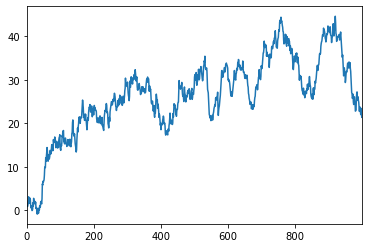

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Series
data = pd.Series(np.random.randn(1000), index=np.arange(1000))
data = data.cumsum()
data.plot()
plt.show()

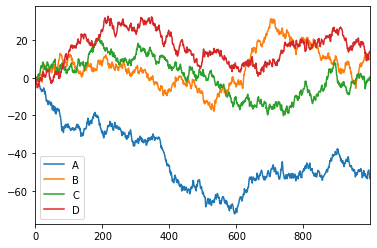

In [47]:
# DataFrame
data = pd.DataFrame(np.random.randn(1000, 4), index=np.arange(1000), columns=list("ABCD"))
data = data.cumsum()
data.plot()
plt.show()

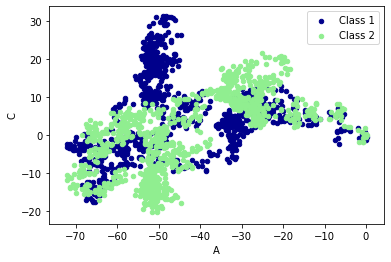

In [48]:
# plot methods:
# 'bar', 'hist', 'box', 'kde', 'area', scatter', hexbin', 'pie'

ax = data.plot.scatter(x='A', y='B', color='DarkBlue', label="Class 1")
data.plot.scatter(x='A', y='C', color='LightGreen', label='Class 2', ax=ax)
plt.show()